In [3]:
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

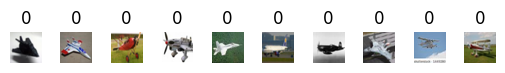

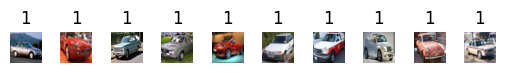

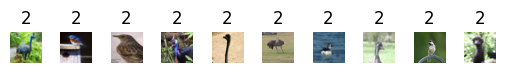

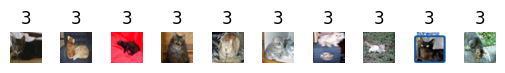

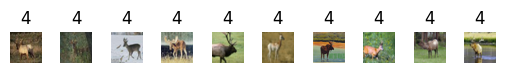

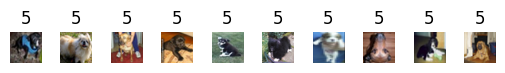

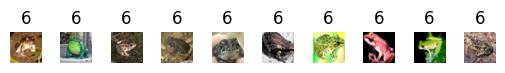

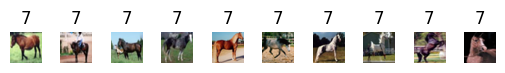

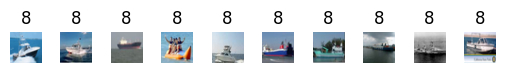

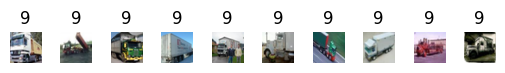

In [4]:
cnt = 1
classes = np.unique(y_train)

for cls in classes:
    # Select the first 10 images from the training data that belong to the current class
    imgs_to_show = X_train[(y_train == cls).flatten()][:10]

    # Create subplots for each of the 10 images
    for img in imgs_to_show:
        plt.subplot(10, 10, cnt)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{cls}")
        cnt += 1

    plt.show()

In [5]:
X_train = np.array([img.flatten() for img in X_train])
X_test = np.array([img.flatten() for img in X_test])


In [6]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [8]:
from sklearn.metrics import accuracy_score
tr_pred = model.predict(X_train)
ts_pred = model.predict(X_test)
print(accuracy_score(y_train, tr_pred))
print(accuracy_score(y_test, ts_pred))


0.50534
0.3398


Random Image:


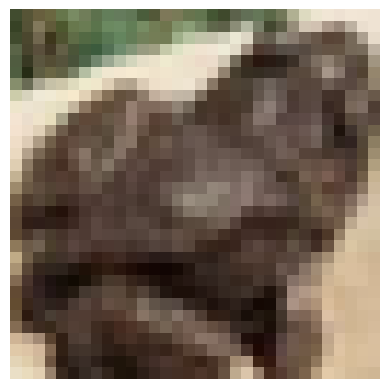

Predicted Class: frog


In [83]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
# Select a random row (image) from X_train
random_index = np.random.choice(X_train.index)
random_img = X_train.loc[random_index].to_numpy()

# Predict the class of the random image
predicted = model.predict([random_img])

# Print the random image and its predicted class
print("Random Image:")
plt.imshow(random_img.reshape(32, 32, 3))
plt.axis("off")
plt.show()

predicted_class_label = predicted[0]
predicted_class_name = class_names[predicted_class_label]
print("Predicted Class:", predicted_class_name)

In [10]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = GaussianNB()
model4 = KNeighborsClassifier(n_neighbors=5)
vot_model = VotingClassifier(estimators=[("LR", model1), ("DT", model2),
                                         ("NB", model3), ("KNN", model4)])

In [11]:
vot_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier()),
                             ('NB', GaussianNB()),
                             ('KNN', KNeighborsClassifier())])

In [12]:

from sklearn.metrics import accuracy_score
tr_pred = vot_model.predict(X_train)
ts_pred = vot_model.predict(X_test)
print(accuracy_score(y_train, tr_pred))
print(accuracy_score(y_test, ts_pred))

0.68076
0.3844


Random Image:


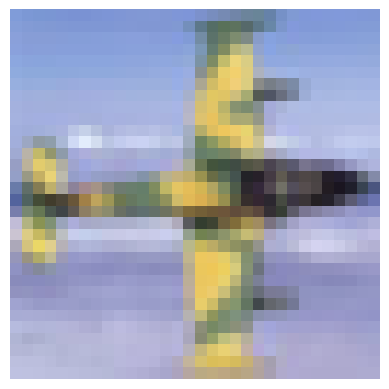

Predicted Class: airplane


In [62]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
# Select a random row (image) from X_train
random_index = np.random.choice(X_train.index)
random_img = X_train.loc[random_index].to_numpy()

# Predict the class of the random image
predicted = vot_model.predict([random_img])

# Print the random image and its predicted class
print("Random Image:")
plt.imshow(random_img.reshape(32, 32, 3))
plt.axis("off")
plt.show()

predicted_class_label = predicted[0]
predicted_class_name = class_names[predicted_class_label]
print("Predicted Class:", predicted_class_name)